In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from src.featutils import aggregate_features_from_folder
from src.features import radioprop

train_dir = "data/tc4tl_training_data_v1/tc4tl/data/train/"
train_key = pd.read_csv("data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv", sep="\t")
test_dir = "data/tc4tl_data_v5/tc4tl/data/test/"
test_key = pd.read_csv("data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv", sep="\t")
dev_dir = "data/tc4tl_data_v5/tc4tl/data/dev/"
dev_key = pd.read_csv("data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv", sep="\t")

### Hyperparameters

In [277]:
hyperparams = {
    "LinearApprox": {"TX": -61.02, "N": 2.187},
    "Friis": dict(Pt_dBm=0., Gt_dBi=1., Gr_dBi=1., f=2.4e9, L=1., n=2.),
    "LogNormal": dict(Pt_dBm=-20., Gt_dBi=1., Gr_dBi=1.,
                      f=2.4e9, d0=1., L=1., sigma=2., n=2)
}

In [325]:
trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=True,
                               tunables=hyperparams)

Post-processing: bhimjuav_tc4tl20.csv: 100%|██████████| 1000/1000 [00:01<00:00, 736.40it/s]


In [326]:
trainset

,LinearApprox:Hist_0.15,LinearApprox:Hist_0.25,LinearApprox:Hist_0.35,LinearApprox:Hist_0.45,LinearApprox:Hist_0.55,LinearApprox:Hist_0.65,LinearApprox:Hist_0.75,LinearApprox:Hist_0.85,LinearApprox:Hist_0.95,LinearApprox:Hist_1.05,...,LogNormal:Hist_4.25,LogNormal:Hist_4.35,LogNormal:Hist_4.45,LogNormal:Hist_4.55,LogNormal:Hist_4.65,LogNormal:Hist_4.75,LogNormal:Hist_4.85,LogNormal:Hist_4.95,CoarseGrain,DistanceFloat
0,0.000000,0.000000,0.008826,0.009943,0.056430,0.079710,0.232493,0.110692,0.099792,0.0,...,0.0,0.0,0.225989,0.0,0.0,0.0,0.0,0.173913,1.0,3.0
1,0.000000,0.000000,0.092674,0.281250,0.309711,0.222222,0.322129,0.425157,0.162162,0.0,...,0.0,0.0,0.127119,0.0,0.0,0.0,0.0,0.096273,1.0,1.8
2,0.036072,0.324037,0.142983,0.140625,0.144357,0.096618,0.089636,0.064151,0.089397,0.0,...,0.0,0.0,0.039548,0.0,0.0,0.0,0.0,0.018634,0.0,1.8
3,0.000000,0.000000,0.000000,0.000000,0.082677,0.147343,0.221289,0.100629,0.072765,0.0,...,0.0,0.0,0.014124,0.0,0.0,0.0,0.0,0.003106,1.0,3.0
4,0.000000,0.189907,0.310680,0.223011,0.165354,0.096618,0.210084,0.118239,0.045738,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.977956,0.515272,0.257723,0.711648,0.429134,0.652174,1.000000,0.538365,0.347193,0.0,...,0.0,0.0,0.155367,0.0,0.0,0.0,0.0,0.136646,0.0,1.8
996,0.000000,0.000000,0.000000,0.000000,0.059055,0.019324,0.131653,0.035220,0.014553,0.0,...,0.0,0.0,0.121469,0.0,0.0,0.0,0.0,0.108696,1.0,4.5
997,0.000000,0.000000,0.023831,0.116477,0.082677,0.043478,0.145658,0.296855,0.234927,0.0,...,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.018634,0.0,1.8
998,0.004008,0.333333,0.179170,0.096591,0.132546,0.115942,0.148459,0.177358,0.189189,0.0,...,0.0,0.0,0.045198,0.0,0.0,0.0,0.0,0.018634,1.0,1.2


In [327]:
pipe.inverse_transform(trainset)

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+01, ...,
         5.60000000e+01,  1.00000000e+00,  1.11000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.05000000e+02, ...,
         3.10000000e+01,  1.00000000e+00,  7.14000000e+00],
       [ 1.80000000e+01,  2.44000000e+02,  1.62000000e+02, ...,
         6.00000000e+00,  0.00000000e+00,  7.14000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  2.70000000e+01, ...,
         6.00000000e+00,  0.00000000e+00,  7.14000000e+00],
       [ 2.00000000e+00,  2.51000000e+02,  2.03000000e+02, ...,
         6.00000000e+00,  1.00000000e+00,  5.16000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.77635684e-15, ...,
         5.70000000e+01,  0.00000000e+00,  1.60500000e+01]])

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

feat_cols = [col for col in trainset.columns if col != 'DistanceFloat' ]
X, y = trainset[feat_cols], trainset['DistanceFloat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
regr = RandomForestRegressor()

regr.fit(X_train, y_train.values)
ypred = regr.predict(X_test)
mean_squared_error(y_test, ypred)

0.8490055909090908

In [329]:
devset, _ = aggregate_features_from_folder(dev_dir, dev_key, feat_fn=radioprop.extract_features, pipe=pipe,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=False,
                               tunables=hyperparams)

Post-processing: zzxttrqc_tc4tl20.csv: 100%|██████████| 935/935 [00:01<00:00, 727.11it/s]


In [334]:
dpred = regr.predict(devset[feat_cols])
mean_squared_error(devset["DistanceFloat"], dpred)

1.5751297540106943

(array([226., 133., 133., 117.,  77.,  88.,  71.,  53.,  33.,   4.]),
 array([1.55431223e-15, 3.09300000e-01, 6.18600000e-01, 9.27900000e-01,
        1.23720000e+00, 1.54650000e+00, 1.85580000e+00, 2.16510000e+00,
        2.47440000e+00, 2.78370000e+00, 3.09300000e+00]),
 <BarContainer object of 10 artists>)

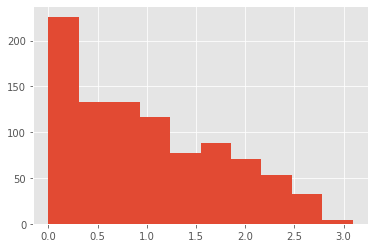

In [335]:
plt.hist(abs(dpred - devset["DistanceFloat"].values))

Post-processing: zzzgwsci_tc4tl20.csv: 100%|██████████| 8423/8423 [00:11<00:00, 743.08it/s]


(array([2247., 1303., 1184.,  969.,  771.,  764.,  498.,  507.,  117.,
          63.]),
 array([0.    , 0.3228, 0.6456, 0.9684, 1.2912, 1.614 , 1.9368, 2.2596,
        2.5824, 2.9052, 3.228 ]),
 <BarContainer object of 10 artists>)

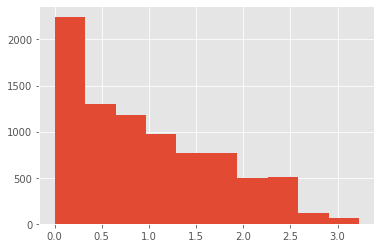

In [336]:
testset, _ = aggregate_features_from_folder(test_dir, test_key, feat_fn=radioprop.extract_features, pipe=pipe,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=False,
                               tunables=hyperparams)
tpred = regr.predict(testset[feat_cols])
mse = mean_squared_error(testset['DistanceFloat'], tpred)
plt.hist(abs(tpred - testset["DistanceFloat"].values))

In [337]:
mse

1.5441032446871654

## Hyperparameter Search

In [352]:
from hyperopt import hp, tpe, fmin

hyperparams = {
    "LinearApprox": {"TX": -61.02, "N": 2.187},
    "Friis": dict(Pt_dBm=0., Gt_dBi=1., Gr_dBi=1., f=2.4e9, L=1., n=2.),
    "LogNormal": dict(Pt_dBm=-20., Gt_dBi=1., Gr_dBi=1.,
                      f=2.4e9, d0=1., L=1., n=2)
}

hparam_space = {
    "LinearApprox" : {
        "TX" : hp.uniform("LinearApprox.TX", -20, 20),
        "N"  : hp.uniform("LinearApprox.N", 0.5, 7.5)
    },
    "Friis" : dict(
        Pt_dBm= hp.uniform("Friis.Pt_dBm", -20, 20),
        Gt_dBi= hp.uniform("Friis.Gt_dBi", -10, 10),
        Gr_dBi= hp.uniform("Friis.Gr_dBi", -10, 10),
        f=hp.uniform("Friis.f", 2.402e9, 2.480e9),
        L=hp.uniform("Friis.L", 0.5, 2.5),
        n=hp.uniform("Friis.n", 0.5, 7.5)
    ),
    "LogNormal" : dict(   
        Pt_dBm= hp.uniform("LogNormal.Pt_dBm", -20, 20),
        Gt_dBi= hp.uniform("LogNormal.Gt_dBi", -10, 10),
        Gr_dBi= hp.uniform("LogNormal.Gr_dBi", -10, 10),
        f=hp.uniform("LogNormal.f", 2.402e9, 2.480e9),
        L=hp.uniform("LogNormal.L", 0.5, 2.5),
        n=hp.uniform("LogNormal.n", 0.5, 7.5)
    )
}

In [370]:
def evaluate_hparams(params, testing=3000, verbose=False):
    trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=verbose, testing=testing,
                               tunables=params)
    feat_cols = [col for col in trainset.columns if col != 'DistanceFloat' ]
    X, y = trainset[feat_cols], trainset['DistanceFloat']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train.values)
    ypred = regr.predict(X_test)
    return mean_squared_error(y_test, ypred)


def make_trainset(params, testing, verbose):
    trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=radioprop.extract_features,
                           postproc_fn=radioprop.postproc_feature_dicts, verbose=verbose, testing=testing,
                           tunables=params)
    return trainset, pipe

In [364]:
best_params = fmin(evaluate_hparams, space=hparam_space, algo=tpe.suggest, max_evals=50)

100%|██████████| 50/50 [05:51<00:00,  7.02s/trial, best loss: 0.5471113727272728]


In [365]:
best_params

{'Friis.Gr_dBi': -3.464561870341017,
 'Friis.Gt_dBi': 0.20597726357898227,
 'Friis.L': 2.1516474937337478,
 'Friis.Pt_dBm': 17.87357752441881,
 'Friis.f': 2403652319.6880946,
 'Friis.n': 2.930021915116384,
 'LinearApprox.N': 2.915682422144732,
 'LinearApprox.TX': 11.682119667187617,
 'LogNormal.Gr_dBi': -5.125678676280162,
 'LogNormal.Gt_dBi': -4.108101510558816,
 'LogNormal.L': 0.7656207801852686,
 'LogNormal.Pt_dBm': -1.8532796868212498,
 'LogNormal.f': 2463516474.7305307,
 'LogNormal.n': 3.7519240746066163}

In [366]:
from src.features.radioprop import compress_hyperparams

tunables = compress_hyperparams(best_params)
tunables

{'Friis': {'Gr_dBi': -3.464561870341017,
  'Gt_dBi': 0.20597726357898227,
  'L': 2.1516474937337478,
  'Pt_dBm': 17.87357752441881,
  'f': 2403652319.6880946,
  'n': 2.930021915116384},
 'LinearApprox': {'N': 2.915682422144732, 'TX': 11.682119667187617},
 'LogNormal': {'Gr_dBi': -5.125678676280162,
  'Gt_dBi': -4.108101510558816,
  'L': 0.7656207801852686,
  'Pt_dBm': -1.8532796868212498,
  'f': 2463516474.7305307,
  'n': 3.7519240746066163}}

In [369]:
evaluate_hparams(tunables, testing=0)

0.648850509090909

## Evaluate on Dev/Test sets after Tuning

In [372]:
trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=tunables)
feat_cols = [col for col in trainset.columns if col != 'DistanceFloat' ]
X, y = trainset[feat_cols], trainset['DistanceFloat']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Post-processing: zzzjbxhg_tc4tl20.csv: 100%|██████████| 15552/15552 [00:20<00:00, 746.16it/s]


RandomForestRegressor()

In [374]:
regr = RandomForestRegressor()
regr.fit(X, y)

RandomForestRegressor()

In [380]:
trpred = regr.predict(trainset[feat_cols])
mean_squared_error(trainset["DistanceFloat"], trpred)

0.04696227777777795

In [382]:
devset, _ = aggregate_features_from_folder(dev_dir, dev_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=tunables, pipe=pipe)
dpred = regr.predict(devset[feat_cols])
mean_squared_error(devset["DistanceFloat"], dpred)

Post-processing: zzxttrqc_tc4tl20.csv: 100%|██████████| 935/935 [00:01<00:00, 604.08it/s]


1.4419072684491976

In [383]:
testset, _ = aggregate_features_from_folder(test_dir, test_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=tunables, pipe=pipe)

tpred = regr.predict(testset[feat_cols])
mean_squared_error(testset["DistanceFloat"], tpred)

Post-processing: zzzgwsci_tc4tl20.csv: 100%|██████████| 8423/8423 [00:11<00:00, 754.14it/s]


1.515745620918912

## Evaluate on Dev/Test sets before Tuning

In [384]:
hyperparams

{'LinearApprox': {'TX': -61.02, 'N': 2.187},
 'Friis': {'Pt_dBm': 0.0,
  'Gt_dBi': 1.0,
  'Gr_dBi': 1.0,
  'f': 2400000000.0,
  'L': 1.0,
  'n': 2.0},
 'LogNormal': {'Pt_dBm': -20.0,
  'Gt_dBi': 1.0,
  'Gr_dBi': 1.0,
  'f': 2400000000.0,
  'd0': 1.0,
  'L': 1.0,
  'n': 2}}

In [385]:
trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams)
feat_cols = [col for col in trainset.columns if col != 'DistanceFloat' ]
X, y = trainset[feat_cols], trainset['DistanceFloat']

Post-processing: zzzjbxhg_tc4tl20.csv: 100%|██████████| 15552/15552 [00:21<00:00, 724.19it/s]


In [386]:
regr = RandomForestRegressor()
regr.fit(X, y)
trpred = regr.predict(trainset[feat_cols])
mean_squared_error(trainset["DistanceFloat"], trpred)

0.04596780381944461

In [387]:
devset, _ = aggregate_features_from_folder(dev_dir, dev_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams, pipe=pipe)
dpred = regr.predict(devset[feat_cols])
mean_squared_error(devset["DistanceFloat"], dpred)

Post-processing: zzxttrqc_tc4tl20.csv: 100%|██████████| 935/935 [00:01<00:00, 642.51it/s]


1.4723581475935825

In [388]:
testset, _ = aggregate_features_from_folder(test_dir, test_key, feat_fn=radioprop.extract_features,
                               postproc_fn=radioprop.postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams, pipe=pipe)

tpred = regr.predict(testset[feat_cols])
mean_squared_error(testset["DistanceFloat"], tpred)

Post-processing: zzzgwsci_tc4tl20.csv: 100%|██████████| 8423/8423 [00:11<00:00, 741.31it/s]


1.5488662096640147